# Data Analysis in Subnuclear Physics - Exam January 2025: **Charge sharing**

*This exercise has been prepared with great support by Fabio Davolio.*

Today we are studying the charge sharing in a solid state detector with resistive electrodes. The basic idea is that when a particle deposit energy in the active region, the generated charge induces a current signal collected by four electrodes. From the charge integrated by the four electrodes, one may compute the position of the impinging particle.

The dataset we are studying is obtained injecting charge with an infrared laser focused on top of the sensor. Since silicon is only partially transparent to infrared light, part of the energy is converted into electron-hole pairs.
The intensity of the laser has been tuned to make the deposited charge consistent with a traversing Minimum Ionizing Particle (MIP).

The sensor can be displaced with a precise system enabling an accurate scan of the response of the device in different positions. Unfortunately, a thin Aluminium wire shadows part of the device (the corresponding stripe has been removed from the dataset).

A sensor with 16 electrodes (and 9 cells) is represented below.
The pitch (the distance between adjacent electrodes) is 500 $\mu$m. The active region is $450 \mu \mathrm{m} \times 450 \mu \mathrm{m}$.

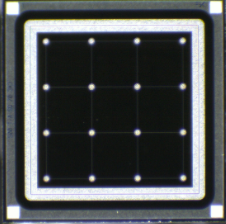



## Libraries
In this exercise we are using three masterpieces of the standard PyData software stack: `numpy`, `matplotlib` and `scikit-learn`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Dataset
The dataset can be obtained from the INFN storage `pandora` at the link: https://pandora.infn.it/public/b2a44b/dl/center-of-gravity.npz

The dataset has been obtained in a scan of a single cell with the four channels of an oscilloscope connected to the four electrodes at the corners of the cell.

The dataset includes the positions of the laser spot in the cell, relative to the cell center, and the waveforms acquired by the four channels.

Each waveform consists of 42 samples (*i.e.*, 42 pairs (time, voltage)).

It contains the following keys:
 * `C1_Time`, `C2_Time`, `C3_Time`, `C4_Time`: the time axes for the acquired voltage time series expressed in seconds;
 * `C1_Amplitude`, `C2_Amplitude`, `C3_Amplitude`, `C4_Amplitude`: the voltage samples corresponding of the acquired waveforms;
 * `x` and `y` the position of the laser spot on the sensor, relative to the center of the cell.

The waveform are two-dimensional arrays where the first index represent the number of the acquired waveform and the second the sample within a single waveform.

In [ ]:
# Download the dataset
!wget https://pandora.infn.it/public/b2a44b/dl/center-of-gravity.npz -O dataset.npz

# Load the dataset in numpy
f = np.load('dataset.npz')

# Convert the file into a dictionary to enable adding new features
f = {k: f[k] for k in f.keys()}

# Print the keys within the dataset and the corresponding shapes
for k in f.keys():
  print (f"{k} with shape {f[k].shape}")


--2025-01-23 09:24:22--  https://pandora.infn.it/public/b2a44b/dl/center-of-gravity.npz
Resolving pandora.infn.it (pandora.infn.it)... 131.154.52.50
Connecting to pandora.infn.it (pandora.infn.it)|131.154.52.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236905346 (226M) [application/force-download]
Saving to: ‘dataset.npz’

dataset.npz         100%[===================>] 225.93M  20.3MB/s    in 13s     

2025-01-23 09:24:36 (17.4 MB/s) - ‘dataset.npz’ saved [236905346/236905346]

C1_Time with shape (87612, 42)
C2_Time with shape (87612, 42)
C3_Time with shape (87612, 42)
C4_Time with shape (87612, 42)
C1_Amplitude with shape (87612, 42)
C2_Amplitude with shape (87612, 42)
C3_Amplitude with shape (87612, 42)
C4_Amplitude with shape (87612, 42)
x with shape (87612,)
y with shape (87612,)


## Exercise 1 - Draw the average waveform

To identify the time interval where the signal is expected, we plot the mean waveform for each channel, obtained by averaging all the waveforms.

Have a look to [`numpy.mean`](https://numpy.org/doc/2.1/reference/generated/numpy.mean.html) and in particular to the `axis` argument to get started.

> **Hint.** You can get started from the following snippet
> ```python
> plt.figure(figsize=(10, 6))
> for i_plot in range(1, 5):
>   plt.subplot(2, 2, i_plot)
>   t_mean = ...
>   v_mean = ...
>   plt.plot(t_mean/1e-9, v_mean/1e-3)
>   plt.xlabel(f"Time [ns]")
>   plt.ylabel(f"Voltage CH #%d [mV]" % i_plot)
>
> plt.tight_layout()
> plt.show()
> ```


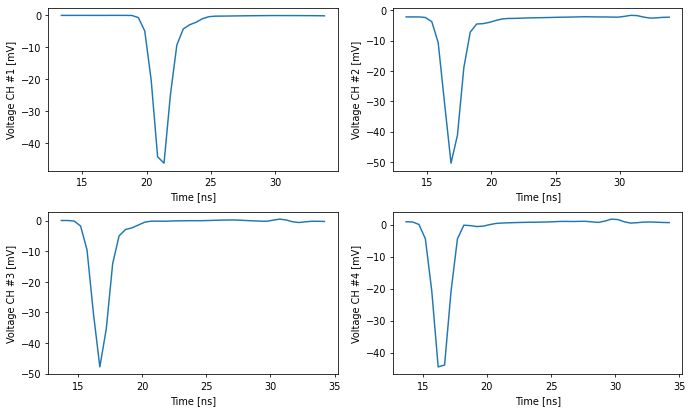

In [ ]:
# Solution
plt.figure(figsize=(10, 6), dpi=70)
for i_plot in range(1, 5):
  plt.subplot(2, 2, i_plot)
  t_mean = np.mean(f['C%d_Time' % i_plot], axis=0)
  v_mean = np.mean(f['C%d_Amplitude' % i_plot], axis=0)
  plt.plot(t_mean/1e-9, v_mean/1e-3)
  plt.xlabel(f"Time [ns]")
  plt.ylabel(f"Voltage CH #%d [mV]" % i_plot)

plt.tight_layout()
plt.show()

## Exercise 2 - Identify the signal interval and a pure-noise interval for each channel

To compute the acquired charge we will need to integrate the acquired waveforms.
Since, as it is evident from the image above, the signal is relevant only in a sub-interval of the waveform, we can integrate only in that interval.

At the same time, to compensate for a possible offset of the waveform or low-frequency noise, we can select a pure-background interval with the same length and integrate that as well.

We will defined the acquired charge as
$$
Q_{\mathtt{ch}} = \int_{\mathrm{SIGNAL}}\!\!\!\!\!\!\!\! v_{\mathtt{ch}}(t) \mathrm dt - \int_{\mathrm{NOISE}} \!\!\!\!\!\!\!\! v_{\mathtt{ch}} \mathrm dt
$$

> **Hint!** You can start from the solution of the exercise above and prepend the following
> ```python
> # Define the signal and background boundaries in nanoseconds
> signal_boundaries = {
>     1: ..., # pick your boundaries in nanoseconds,
>     2: ...,
>     3: ...,    
>     4: ...,    
> }
>
> noise_boundaries = {
>     1: ...,
>     2: ...,
>     3: ...,    
>     4: ...,    
> }
>
>  for i_ch in range(1, 5):
>    mean_t_axis = np.mean(f['C%d_Time' % i_ch], axis=0)
>
>    low, high = signal_boundaries[i_ch]
>    mask = ... # define a boolean mask selecting only entries having *mean_t_axis* between *low* and *high*
>    f['C%d_Time_sig' % i_ch] = f['C%d_Time' % i_ch][:, mask]
>    f['C%d_Amplitude_sig' % i_ch] = f['C%d_Amplitude' % i_ch][:, mask]
>  
>    low, high = noise_boundaries[i_ch]
>    mask = ... # define a boolean mask selecting only entries having *mean_t_axis* between *low* and *high*
>    f['C%d_Time_noise' % i_ch] = f['C%d_Time' % i_ch][:, mask]
>    f['C%d_Amplitude_noise' % i_ch] = f['C%d_Amplitude' % i_ch][:, mask]
>
> ```
> The expected output should look like
> 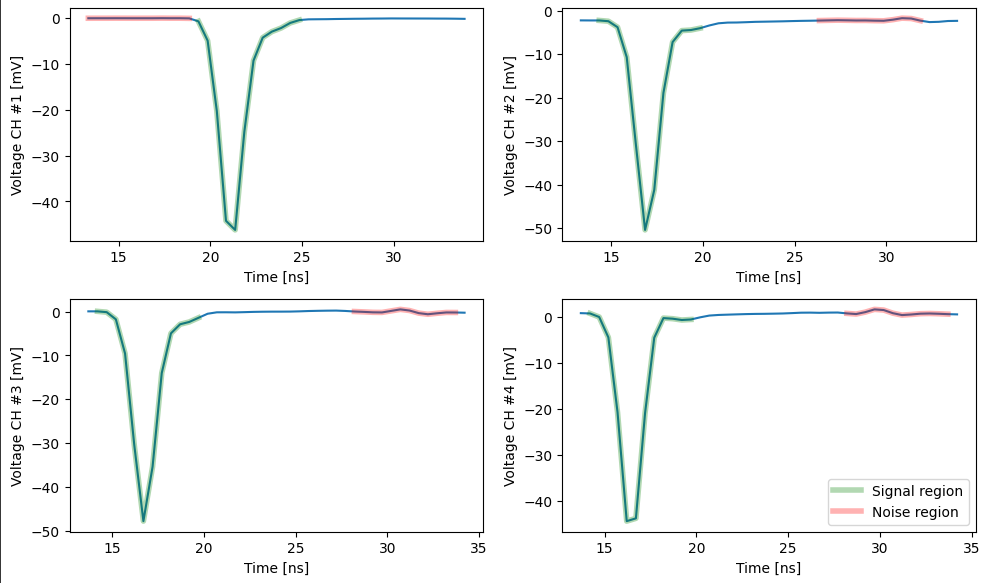


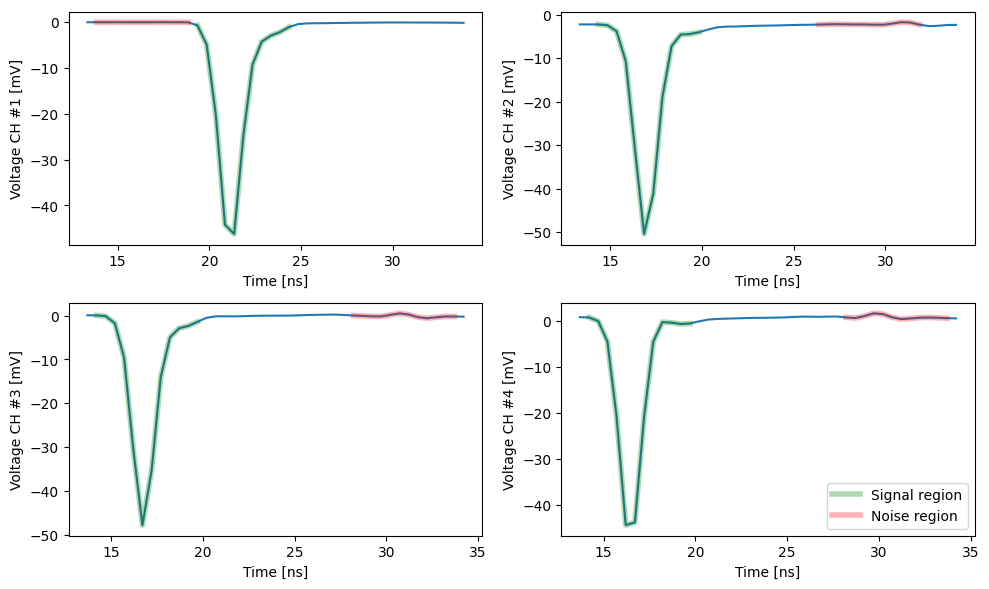

In [ ]:
# Solution
signal_boundaries = {
    1: (19, 24.5),
    2: (14, 20),
    3: (14, 20),
    4: (14, 20),
}

noise_boundaries = {
    1: (13.5, 19),
    2: (26, 32),
    3: (28, 34),
    4: (28, 34),
}



for i_ch in range(1, 5):
  mean_t_axis = np.mean(f['C%d_Time' % i_ch], axis=0)


  low, high = signal_boundaries[i_ch]
  mask = (mean_t_axis > low*1e-9) & (mean_t_axis < high*1e-9)
  f['C%d_Time_sig' % i_ch] = f['C%d_Time' % i_ch][:, mask]
  f['C%d_Amplitude_sig' % i_ch] = f['C%d_Amplitude' % i_ch][:, mask]

  low, high = noise_boundaries[i_ch]
  mask = (mean_t_axis > low*1e-9) & (mean_t_axis < high*1e-9)
  f['C%d_Time_noise' % i_ch] = f['C%d_Time' % i_ch][:, mask]
  f['C%d_Amplitude_noise' % i_ch] = f['C%d_Amplitude' % i_ch][:, mask]


plt.figure(figsize=(10, 6))
for i_plot in range(1, 5):
  plt.subplot(2, 2, i_plot)
  t_mean = np.mean(f['C%d_Time' % i_plot], axis=0)
  v_mean = np.mean(f['C%d_Amplitude' % i_plot], axis=0)
  ts_mean = np.mean(f['C%d_Time_sig' % i_plot], axis=0)
  vs_mean = np.mean(f['C%d_Amplitude_sig' % i_plot], axis=0)
  tb_mean = np.mean(f['C%d_Time_noise' % i_plot], axis=0)
  vb_mean = np.mean(f['C%d_Amplitude_noise' % i_plot], axis=0)
  plt.plot(t_mean/1e-9, v_mean/1e-3)
  plt.plot(ts_mean/1e-9, vs_mean/1e-3, label="Signal region", color='g', alpha=0.3, linewidth=4)
  plt.plot(tb_mean/1e-9, vb_mean/1e-3, label="Noise region", color='r', alpha=0.3, linewidth=4)
  plt.xlabel(f"Time [ns]")
  plt.ylabel(f"Voltage CH #%d [mV]" % i_plot)

plt.legend()
plt.tight_layout()
plt.show()

## Exercise 3 - Compute the charge by subtracting the integrals in the signal and noise intervals

For each channel, implement the computation of the formula
$$
Q_{\mathtt{ch}} = \int_{\mathrm{SIGNAL}}\!\!\!\!\!\!\!\! v_{\mathtt{ch}}(t) \mathrm dt - \int_{\mathrm{NOISE}} \!\!\!\!\!\!\!\! v_{\mathtt{ch}} \mathrm dt
$$

> **Hint.** You may want to have a look to the documentation for [`numpy.trapz`](https://numpy.org/doc/1.25/reference/generated/numpy.trapz.html).
>
> ```python
> for i_plot in (1, 2, 3, 4):
>   f['q%d' % i_plot] = ... # implement the computation of the difference of integrals
>
>   plt.hist(f['q%d' % i_plot]... #draw the histogram
> ```
>
> If you draw the histogram of the $Q_{\mathtt{ch}}$ for the four channels you should obtain something similar to the following
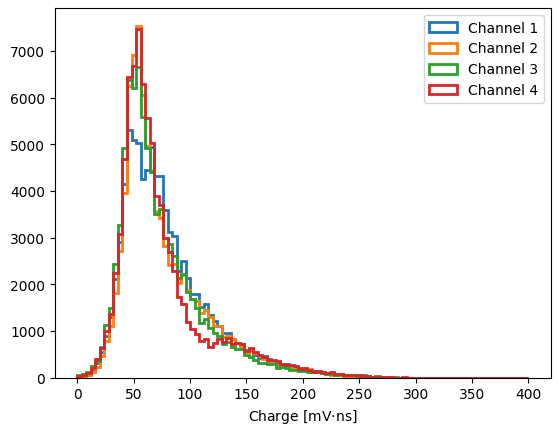



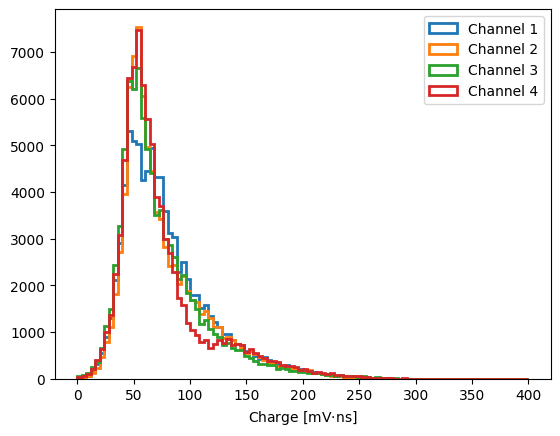

In [ ]:
# Solution
for i_plot in range(1, 5):
  f['q%d' % i_plot] = np.abs(np.trapz(f['C%d_Amplitude_sig' % i_plot], axis=1, x=f['C%d_Time_sig' % i_plot]) - np.trapz(f['C%d_Amplitude_noise' % i_plot], axis=1, x=f['C%d_Time_noise' % i_plot]))

  plt.hist(f['q%d' % i_plot]/1e-9/1e-3, bins=np.linspace(0, 400, 101), histtype='step', linewidth=2, label=f"Channel {i_plot}")

plt.xlabel("Charge [mV$\cdot$ns]")
plt.legend()
plt.show()

## Intermezzo: Geometry

You have now enough information to show how the integrated charge on the four electrodes depends on the position of the laser and to obtain from this the positions associated to the four channels of the oscilloscope.

To save your time, this is step is given.

```python
plt.figure(figsize=(10, 10))

for i_ch in range(1, 5):
  plt.subplot(2, 2, i_ch)
  plt.scatter(f['x'], f['y'], c=f[f'q{i_ch}'], s=10, alpha=0.3, cmap='seismic')
  plt.title(f"Channel {i_ch}")
plt.show()


# Assign each oscilloscope channel to the position of the corresponding electrode.
electrode = {
    1: np.array((-225, 225)),
    2: np.array((225, 225)),
    3: np.array((-225, -225)),
    4: np.array((225, -225))
}
```


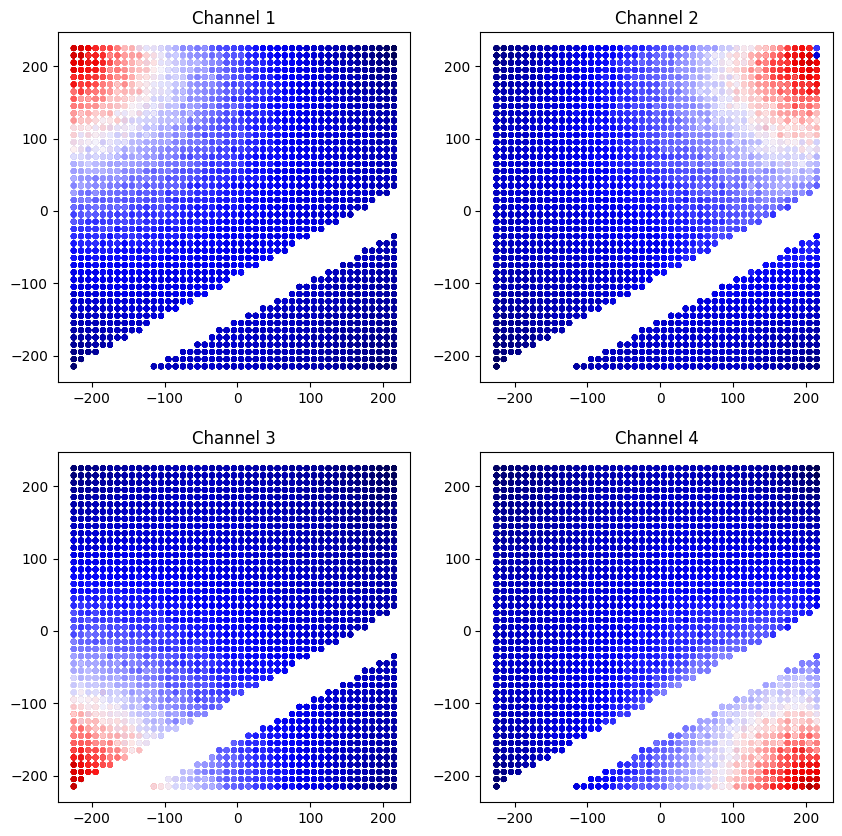

In [ ]:
# Solution
plt.figure(figsize=(10, 10))

for i_ch in range(1, 5):
  plt.subplot(2, 2, i_ch)
  plt.scatter(f['x'], f['y'], c=f[f'q{i_ch}'], s=10, alpha=0.3, cmap='seismic')
  plt.title(f"Channel {i_ch}")
plt.show()


# Assign each oscilloscope channel to the position of the corresponding electrode.
electrode = {
    1: np.array((-225, 225)),
    2: np.array((225, 225)),
    3: np.array((-225, -225)),
    4: np.array((225, -225))
}

## Exercise 4 - Center of gravity

Let's now try to guess the position of the laser spot given the charge integrated by the four electrodes.

As a first approximation you can try to computed a weighted average of the positions of the electrodes, where the weight is the squared charge it collected.
In formula,
$$
\vec x_{\mathrm{cog}} = \frac{\sum_{\mathtt{ch} = 1}^{4} Q^2_{\mathtt{ch}} \vec x_{\mathtt{ch}}}{\sum_{\mathtt{ch} = 1}^{4} Q^2_{\mathtt{ch}}}
$$
where,
 * $Q_\mathtt{ch}$ is the formula computed in Exercise 3,
 * $\vec x_{\mathtt{ch}}$ is the position of the electrode connected to channel $\mathtt{ch}$.



> **Hint.** You can start from the following snippet.
> Note that the built-in function `sum` is used to avoid the explicit sum of the terms corresponding to the four electrodes

```python
f['cog_x'] = sum([... for ch in (1, 2, 3, 4)])/sum([... for ch in (1, 2, 3, 4)])
f['cog_y'] = sum([... for ch in (1, 2, 3, 4)])/sum([... for ch in (1, 2, 3, 4)])
```



In [ ]:
# Solution
f['cog_x'] = sum([electrode[ch][0] * f['q%d' % ch]**2 for ch in (1, 2, 3, 4)])/sum([f['q%d' % ch]**2 for ch in (1, 2, 3, 4)])
f['cog_y'] = sum([electrode[ch][1] * f['q%d' % ch]**2 for ch in (1, 2, 3, 4)])/sum([f['q%d' % ch]**2 for ch in (1, 2, 3, 4)])

The result of this crude approximation can be visualized by drawing a line connecting each sampled point to the position reconstructed using the center-of-gravity approximation.

The points with an integrated charge below 30 mV$\cdot$ns on each of the four electrodes are discarded.

```python
threshold = 30e-12
mask = (f['q1'] > threshold) | (f['q2'] > threshold) | (f['q3'] > threshold) | (f['q4'] > threshold)
usable_f = {k: v[mask] for k, v in f.items()}

plt.figure(figsize=(10, 10))
for idx in np.random.permutation(len(f['x']))[:1000]:
  plt.plot([usable_f['x'][idx], usable_f['cog_x'][idx]], [usable_f['y'][idx], usable_f['cog_y'][idx]], 'k', alpha=0.6)


```

The result will be the following.
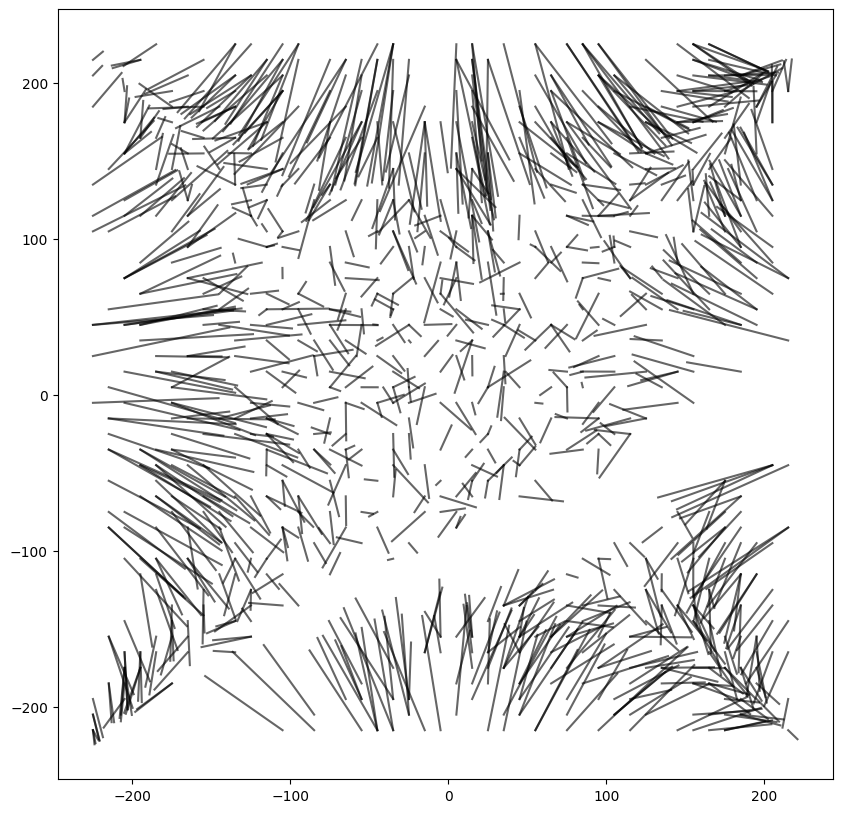

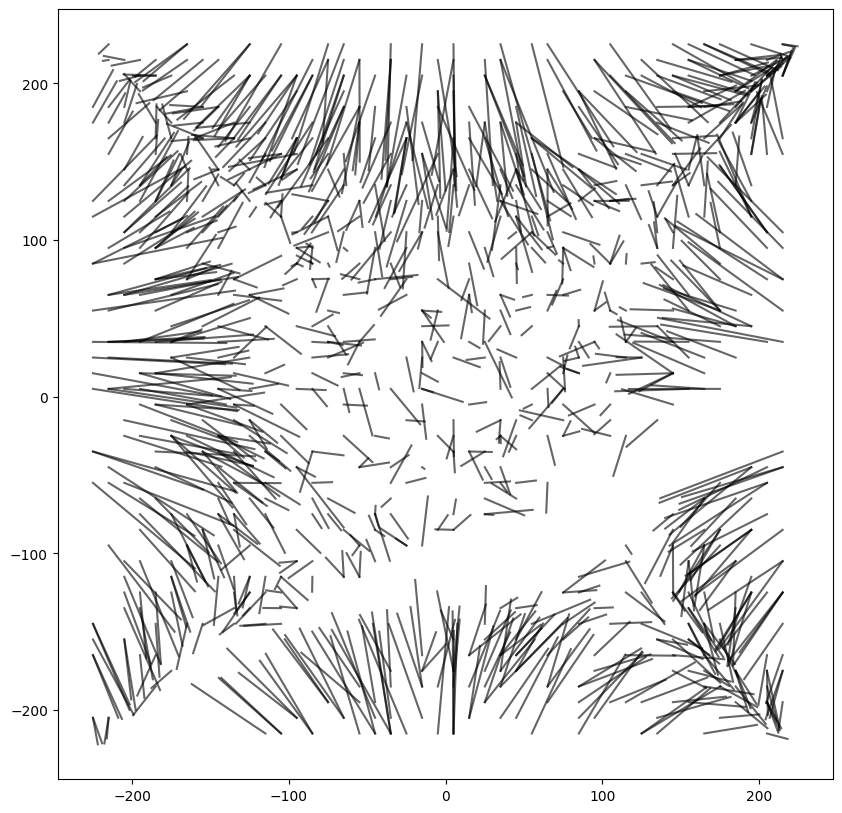

In [ ]:
# Solution
threshold = 30e-12
mask = (f['q1'] > threshold) | (f['q2'] > threshold) | (f['q3'] > threshold) | (f['q4'] > threshold)
usable_f = {k: v[mask] for k, v in f.items()}

plt.figure(figsize=(10, 10))
for idx in np.random.permutation(len(f['x']))[:1000]:
  plt.plot([usable_f['x'][idx], usable_f['cog_x'][idx]], [usable_f['y'][idx], usable_f['cog_y'][idx]], 'k', alpha=0.6)


## Exercise 5 - Polynomial regression

From the plot above, it is clear that there are regions where the shift between the reconstructed position and position of the laser spot is systematic.
This effect can be compensated by adding to the reconstructed position a correction $\vec \Delta$ that will depend on the corrected position itself. Namely,
$$
\vec x_{\mathrm corr} = \vec x_{\mathrm{cog}} + \vec \Delta (\vec x_{\mathrm {cog}})
$$

The correction $\vec \Delta$ can be learned by data, using a simple (but non-linear) algorithm. The simplest effective solution is using a 3$^{\rm rd}$ order polynomial model.

Set up a polynomial regression mapping the position reconstructed with the center-of-gravity method into the difference between the position of the laser spot and the center-of-gravity prediction itself.
```python
X = np.c_[usable_f['cog_x'], usable_f['cog_y']]
y = np.c_[usable_f['x'] - usable_f['cog_x'], usable_f['y'] - usable_f['cog_y']]
```

Then, split the data sample in a train and test set
```python
indices_train, indices_test = np.array_split(np.random.permutation(len(X)), 2)

X_train, X_test = X[indices_train], X[indices_test]
y_train, y_test = y[indices_train], y[indices_test]
```

And setup the polynomial regression. You may want to revise:
 * [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for the preprocessing step defining the polynomial terms;
 * [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html) defining a multi-dimensional linear regression model.

 Finally, reproduce the segment plot of the previous cell, but this time connecting the position of the laser spot to the corrected prediction.

 You should obtain something similar to the following figure, where the geometrical patterns are significantly attenuated.

 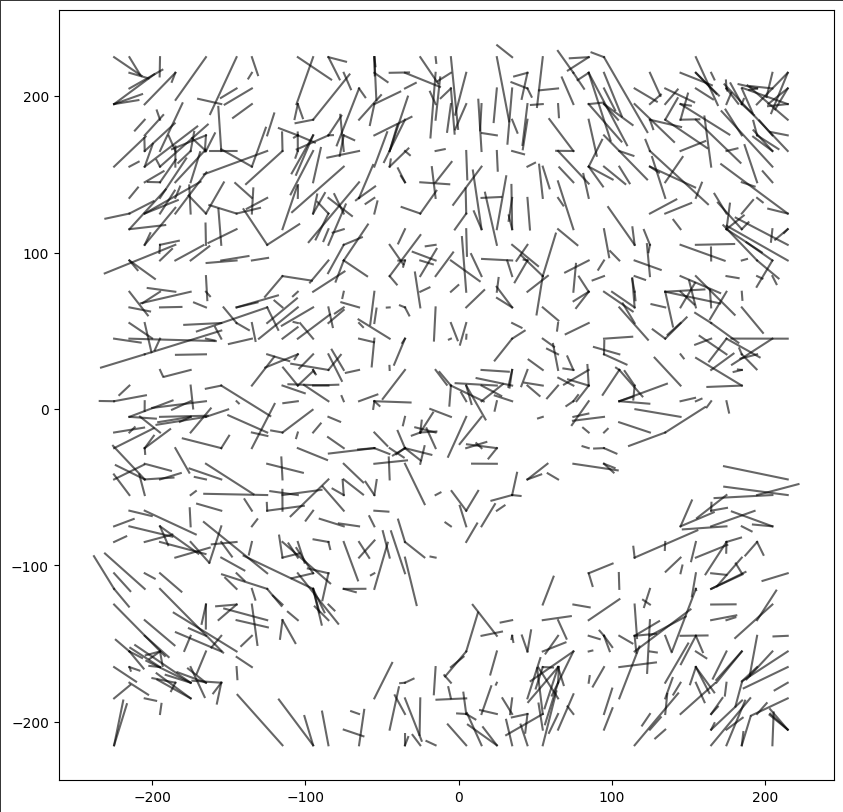

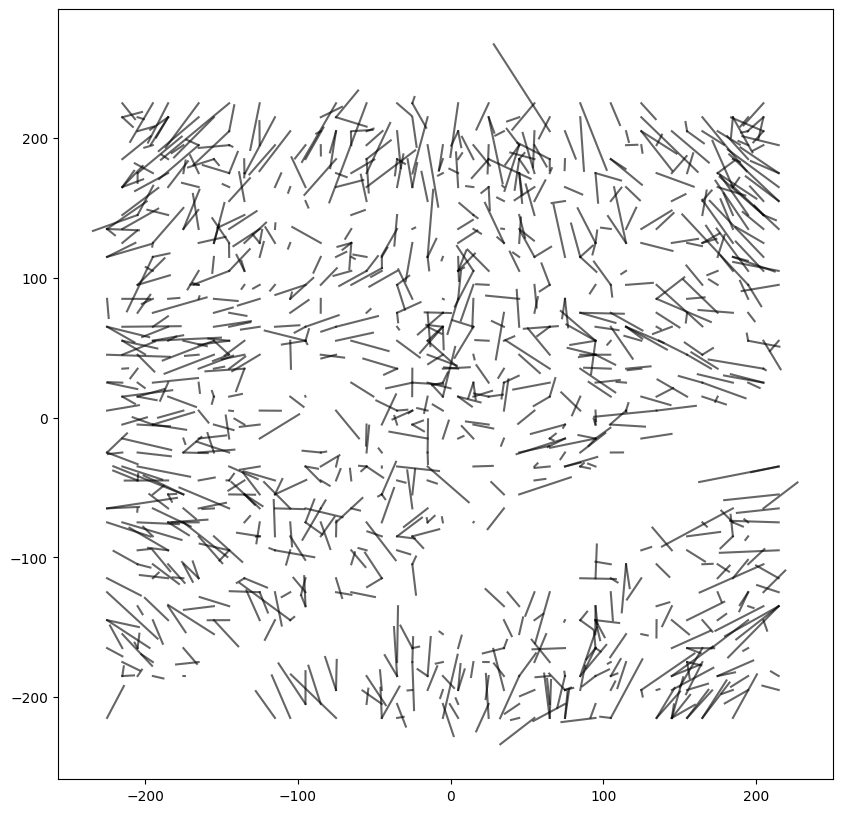

In [ ]:
# Solution
X = np.c_[usable_f['cog_x'], usable_f['cog_y']]
y = np.c_[usable_f['x'] - usable_f['cog_x'], usable_f['y'] - usable_f['cog_y']]

indices_train, indices_test = np.array_split(np.random.permutation(len(X)), 2)

X_train, X_test = X[indices_train], X[indices_test]
y_train, y_test = y[indices_train], y[indices_test]

preprocessing = sklearn.preprocessing.PolynomialFeatures(3)
X_train_prep = preprocessing.fit_transform(X_train)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train_prep, y_train)
usable_f['lr_x'], usable_f['lr_y'] = (X + lr.predict(preprocessing.transform(X))).T

plt.figure(figsize=(10, 10))
for idx in indices_test[:1000]:
  plt.plot([ usable_f['x'][idx], usable_f['lr_x'][idx]], [usable_f['y'][idx], usable_f['lr_y'][idx]], 'k', alpha=0.6)


## Exercise 6 - Average spatial resolution

Draw the histogram of the error (the difference between reconstructed position and the laser-beam spot position) and compute its standard deviation as an estimator of the average spatial resolution of the sensor.

> **Hint.** You should obtain something similar to the following figure.

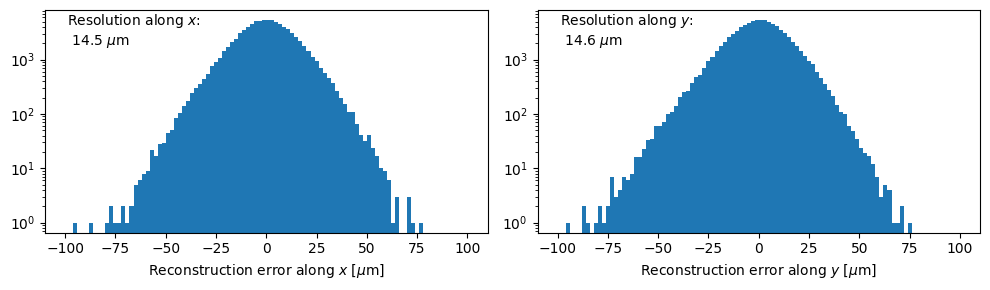

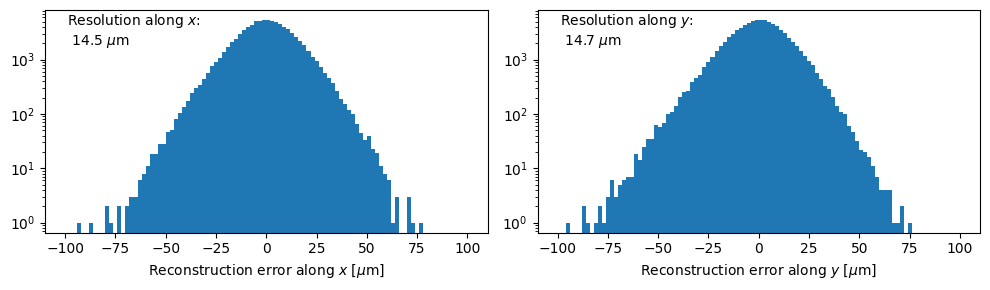

In [ ]:
# Solution
plt.figure(figsize=(10, 3))
for i_plot, coord in enumerate(("x", "y"), 1):
  plt.subplot(1, 2, i_plot)
  err = usable_f[f'lr_{coord}'] - usable_f[coord]
  plt.xlabel(f"Reconstruction error along ${coord}$ [$\mu$m]")
  plt.hist(err, bins=np.linspace(-100, 100, 101))
  plt.yscale('log')
  plt.text(0.05, 0.99, f"Resolution along ${coord}$:\n {np.std(err):.1f} $\mu$m", ha='left', va='top', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

## Bonus track (an `iminuit` exercise)

While very simple and immediate, the 3rd-order polynomial regression described above has too many parameters and does not rely on obvious geometrical symmetries of our problem.

If we write explicitely the polynomial regression, we have
$$
\left\{
  \begin{array}{l}
    x_{\mathrm{corr}} =
      a_{100} +
      a_{110}\ x + a_{101}\ y +
      a_{120}\ x^2 + a_{111}\ x y + a_{102}\ y^2 +
      a_{130}\ x^3 + a_{121}\ x^2 y + a_{112}\ xy^2 + a_{103}\ y^3\\
    y_{\mathrm{corr}} =
      a_{200} +
      a_{210}\ x + a_{201} y +
      a_{220}\ x^2 + a_{211}\ x y + a_{202}\ y^2 +
      a_{230}\ x^3 + a_{221}\ x^2 y + a_{212}\ xy^2 + a_{203}\ y^3  \\
  \end{array}
\right.
$$
where $\vec x_\mathrm{corr} = (x_{\mathrm{corr}}, y_{\mathrm{corr}})$ and,
for brevity, $\vec x_\mathrm{cog} = (x, y)$, dropping the "cog" subscript.

Now, lets have a look to these terms.
 * The coefficients $a_{100}$ and $a_{200}$ would represent a constant correction shifting all the reconstructed points by the same amount. If it was not null, it would correct a mistake in the definition of the position of the electrodes in the reference system defined by positioning system (stepper motors) moving the beam spot on the sensor. In other words they do not belong to this geometrical correction and we drop them.
 * the terms $a_{110}\ x$ and  $a_{201} y$ represent a linear correction of a coordinate based on the same coordinate. If not null, they imply that the distance between the electrodes (that we called the pitch) as measured in the stepper-motor reference system is not consistent with the measurements.
 * with arguments related to the flip symmetries we can easily convince ourselves that the corrections along one coordinate should depend on the same coordinate as an odd function and depend on the other coordinate as an even function. So the coefficients:
  * $a_{100}, a_{102}, a_{120}, a_{121}, a_{200}, a_{220}, a_{202}, a_{212}$ are zero because they introduce even same-cordinate terms;
  * $a_{101}, a_{111}, a_{121}, a_{103}, a_{210}, a_{211}, a_{212}, a_{230} $ are zero because they introduce odd cross-cordinate terms.

$$
\left\{
  \begin{array}{l}
    x_{\mathrm{corr}} =
      a_{130}\ x^3 + a_{112}\ xy^2\\
    y_{\mathrm{corr}} =
      a_{221}\ x^2 y + a_{203}\ y^3  \\
  \end{array}
\right.
$$

Finally, since the pitch along $x$ and $y$ is the same, we have 90°-rotational symmetry which implies that
$$
a_{112} = a_{221} \qquad a_{130} = a_{203}
$$
we will call them $a_1$ and $a_3$ to simplify the relation into
$$
\left\{
  \begin{array}{l}
    x_{\mathrm{corr}} =
      a_1\ xy^2 + a_3\ x^3  \\
    y_{\mathrm{corr}} =
      a_1\ x^2 y + a_3\ y^3  \\
  \end{array}
\right.
$$

We are ready to fit this relation to our dataset.

> **Hint.** You can start from the following snippet
> ```python
> def correction(x_cog, a1, a3):
>   x, y = x_cog.T
>   return np.c_[
>       ..., # definition of x_corr
>       ..., # definition of y_corr
>       ]
>
> def mse(a1, a3):
>   y_hat = correction(X_train, a1, a3)
>   return # Computation of the Mean Squared Error
>
> m = Minuit(mse, a1=0, a3=0)
> m.errordef = 1
> m.simplex().migrad()
```

In [ ]:
! pip install iminuit
from iminuit import Minuit

In [ ]:
# Solution
def correction(x_cog, a1, a3):
  x, y = x_cog.T
  return np.c_[
      a1 * x * y**2 + a3 * x**3,
      a1 * x**2 * y + a3 * y**3,
      ]

def mse(a1, a3):
  y_hat = correction(X_train, a1, a3)
  return np.sum(np.square(y_hat - y_train))

m = Minuit(mse, a1=0, a3=0)
m.errordef = 1
m.simplex().migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.216e+07                  │              Nfcn = 157              │
│ EDM = 3.66e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a1   │-23.1228e-6│ 0.0035e-6 │            │            │         │         │       │
│ 1 │ a3   │21.4264e-6 │ 0.0034e-6 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────┐
│    │         a1         a3 │
├────┼───────────────────────┤
│ a1 │   1.22e-17 -0.011e-15 │
│ a3 │ -0.011e-15   1.13e-17 │
└────┴───────────────────────┘

Finally, you can adapt the code developed above to draw once again the segment graphics and the resolution histogram.
> **Hint.** If everything is correct, the resolution obtained with this method should be consistent with what you got in Exercise 6.

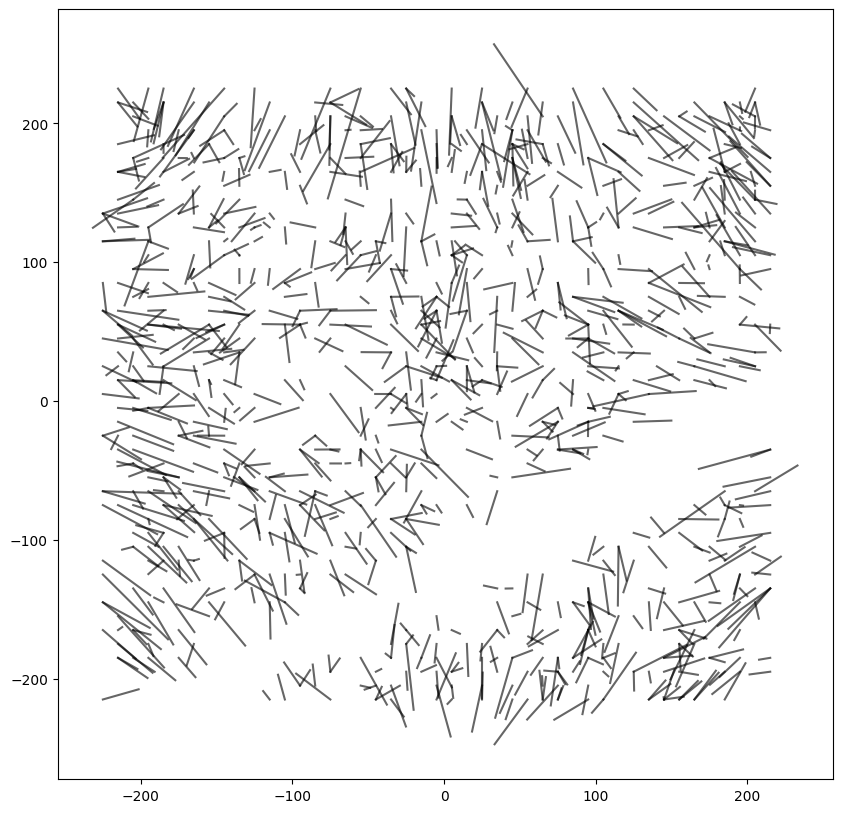

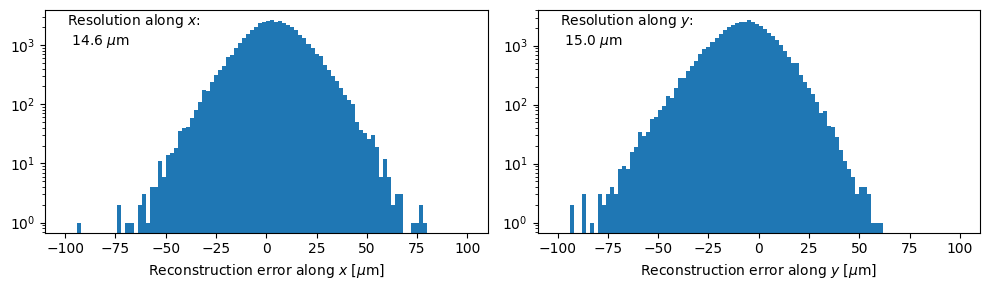

In [ ]:
# Solution

delta = correction(X_test, *m.values)

plt.figure(figsize=(10, 10))
for idx in np.arange(1000):
  plt.plot([X_test[idx,0] + y_test[idx,0], X_test[idx,0] + delta[idx,0]], [X_test[idx,1] + y_test[idx,1], X_test[idx,1] + delta[idx,1]], 'k', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 3))
for i_plot, coord in enumerate(("x", "y"), 1):
  plt.subplot(1, 2, i_plot)
  err = delta[:,i_plot-1] - y_test[:,i_plot-1]
  plt.xlabel(f"Reconstruction error along ${coord}$ [$\mu$m]")
  plt.hist(err, bins=np.linspace(-100, 100, 101))
  plt.yscale('log')
  plt.text(0.05, 0.99, f"Resolution along ${coord}$:\n {np.std(err):.1f} $\mu$m", ha='left', va='top', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()